In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
import pydotplus

In [2]:
df = pd.read_csv("diabetes_dataset.csv", sep=',')
# Eliminando valoes nulos
df = df.dropna()
print(df.head())
df.count()

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


gender                 100000
age                    100000
hypertension           100000
heart_disease          100000
smoking_history        100000
bmi                    100000
HbA1c_level            100000
blood_glucose_level    100000
diabetes               100000
dtype: int64

In [3]:
# Eliminando registros que podrían ser conflictivos
df = df[df.smoking_history != 'No Info']
df = df[df.gender != 'Other']
# Convirtiendo variable categórica gender
df['gender'] = df['gender'].replace(to_replace='Female', value=1)
df['gender'] = df['gender'].replace(to_replace='Male', value=0)
# Convirtiendo variable categórica smoking_history
df['smoking_history'] = df['smoking_history'].replace(to_replace=['never', 'not current'], value=0)
df['smoking_history'] = df['smoking_history'].replace(to_replace=['former', 'current', 'ever'], value=1)
print(df.head())
df.count()

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       1  80.0             0              1                0  25.19   
2       0  28.0             0              0                0  27.32   
3       1  36.0             0              0                1  23.45   
4       0  76.0             1              1                1  20.14   
5       1  20.0             0              0                0  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
5          6.6                   85         0  


gender                 64172
age                    64172
hypertension           64172
heart_disease          64172
smoking_history        64172
bmi                    64172
HbA1c_level            64172
blood_glucose_level    64172
diabetes               64172
dtype: int64

In [4]:
bosque = RandomForestClassifier(
    n_estimators=100, # Cuántos árboles se van a generar
    criterion="gini", # Criterio de creación
    max_features="sqrt", # Cuántas características se van a tomar en cuenta cada vez que se genere una rama
    bootstrap=True, # Muestreo aleatorio de los datos
    max_samples=2/3, # Qué porcentaje vamos a muestrear
    oob_score=True # Out of the bag son las instancias que fueron excluidas para el sampleo
)

x = df.drop(columns=['diabetes'])
y = df['diabetes']

bosque.fit(x, y)

print(bosque.predict([[1,20,0,0,0,27.32,6.6,85]]))
print(bosque.score(x, y))
print(bosque.oob_score_)

C:\Users\elmer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0]
0.9927694321510939
0.9614629433397743


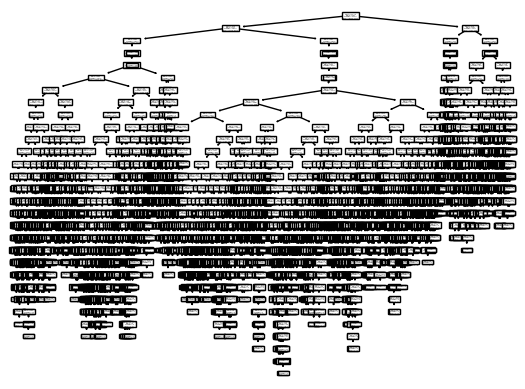

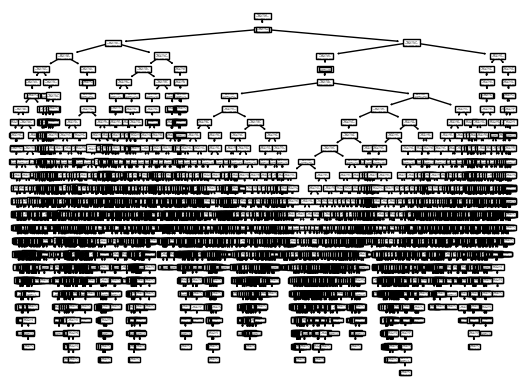

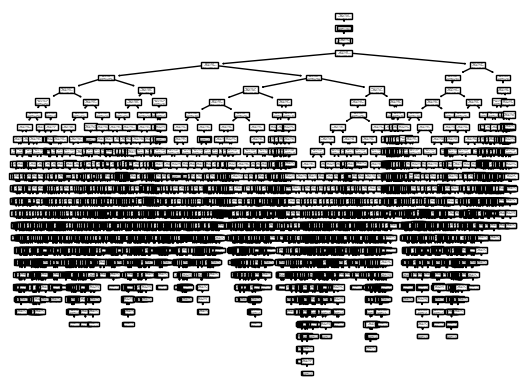

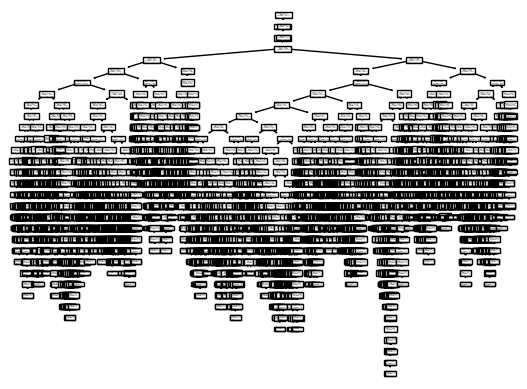

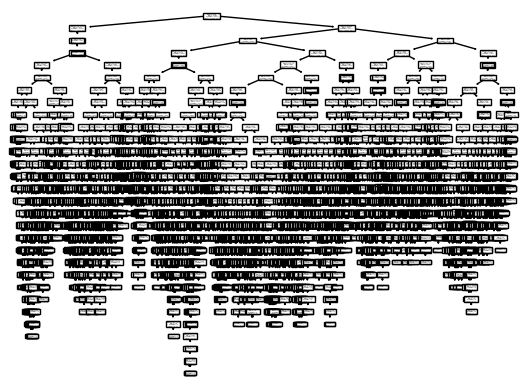

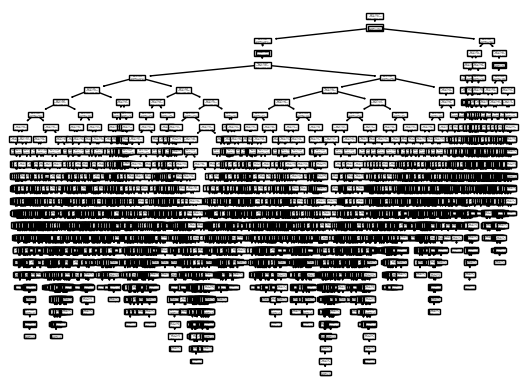

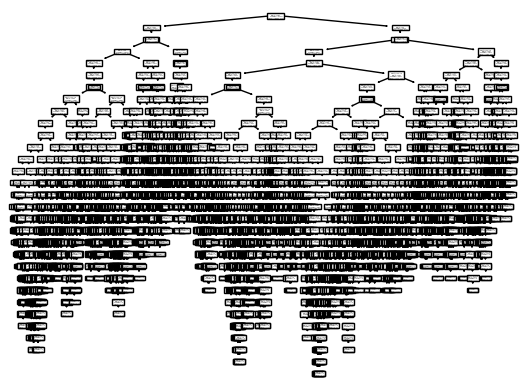

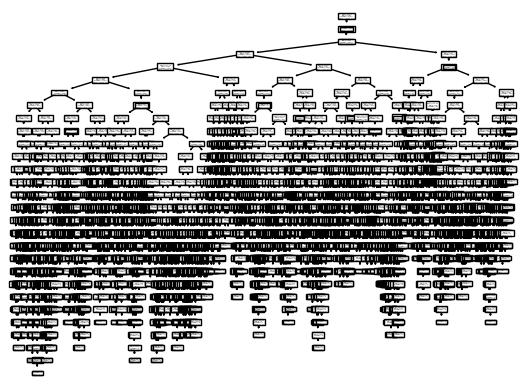

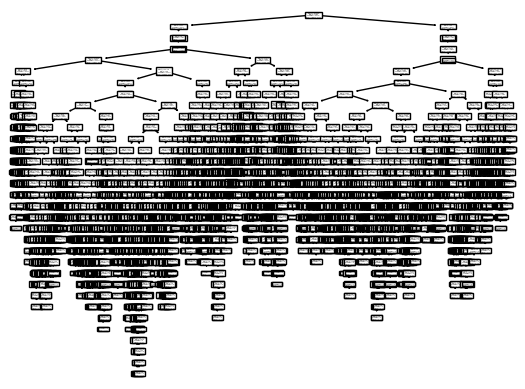

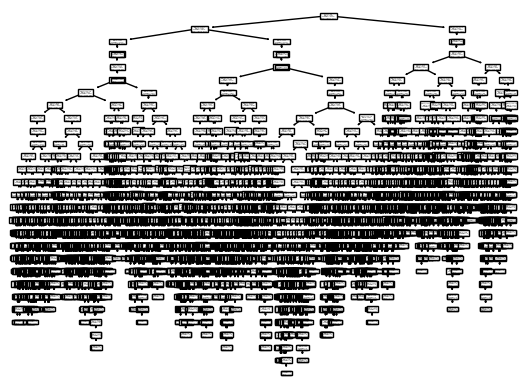

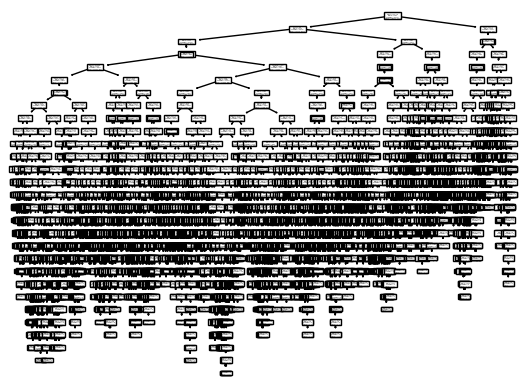

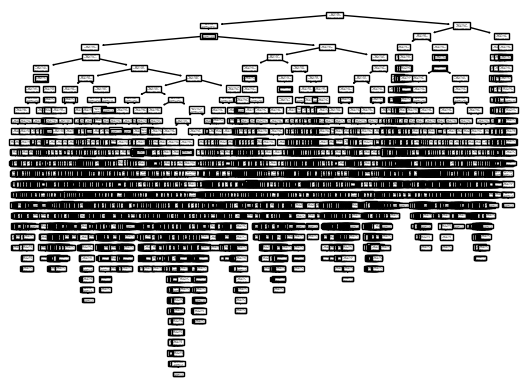

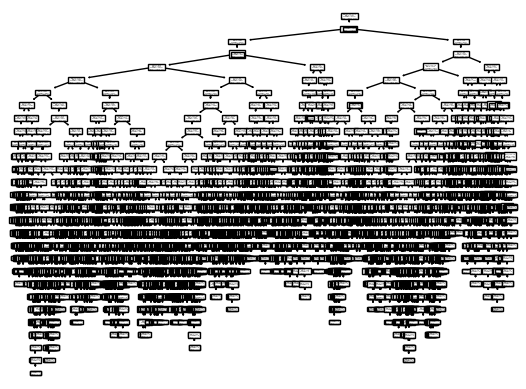

KeyboardInterrupt: 

In [5]:
for arbol in bosque.estimators_:
    tree.plot_tree(
        arbol, 
        feature_names=[
            'gender', 'age', 'hyp', 'heart_d', 'smoking', 'bmi', 'hb1ac', 'glucose'
        ]
    )
    plt.show()